<a href="https://colab.research.google.com/github/Sandeep23017860/Applying-RNN-on-IMDB-Movie-Reviews/blob/main/Stock_Market_Time_Series_Analysis_and_Forecasting_REF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
import pandas as pd
import os

# Final cleaned and sorted ticker list
tickers = sorted(list(set([
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NFLX", "NVDA", "SPY", "AMD",
    "BRK-B", "V", "JPM", "JNJ", "PG", "MA", "DIS", "UNH", "HD", "PYPL", "BA", "INTC",
    "VZ", "WMT", "CSCO", "RTX", "XOM", "COP", "GM", "GE", "CVX", "IBM", "PFE", "KO",
    "PEP", "ABT", "ORCL", "INTU", "AMT", "MCD", "COST", "LMT", "T", "MS", "DE", "LOW",
    "TMO", "CAT", "MMM", "NKE", "ADBE", "AVGO", "GS", "BDX", "ISRG", "VLO", "UPS",
    "LULU", "AXP", "MRK", "SBUX", "WFC", "UNP", "CVS", "ZTS", "TGT", "SPG", "CHTR",
    "AMGN", "MDT", "BIIB", "EL", "CI", "CME", "REGN", "KMB", "BLK", "AIG", "HUM",
    "BMY", "SCHW", "FISV", "PGR", "ETSY", "ADP", "MSCI", "STZ", "TROW", "MELI",
    "ROST", "KR", "SNAP", "TDC", "RMD", "KMX", "AON", "MKC", "WDC", "CTSH", "CSX", "CHD"
])))

start_date = "1997-01-01"

# Create folder to save individual CSVs
os.makedirs("data", exist_ok=True)

stock_data = {}
invalid_tickers = []

for ticker in tickers:
    try:
        df = yf.download(ticker, start=start_date, progress=False, auto_adjust=True)
        if df.empty:
            print(f"⚠️ No data found for {ticker}, skipping.")
            invalid_tickers.append(ticker)
        else:
            print(f"✅ Downloaded data for {ticker}")
            stock_data[ticker] = df
            df.to_csv(f"data/{ticker}.csv")
    except Exception as e:
        print(f"❌ Could not download {ticker}: {e}")
        invalid_tickers.append(ticker)

# Final list of valid tickers
tickers = [t for t in tickers if t not in invalid_tickers]

print(f"\n✅ Successfully downloaded data for {len(tickers)} tickers.")
if invalid_tickers:
    print(f"❌ Failed for {len(invalid_tickers)} tickers: {invalid_tickers}")


✅ Downloaded data for AAPL
✅ Downloaded data for ABT
✅ Downloaded data for ADBE
✅ Downloaded data for ADP
✅ Downloaded data for AIG
✅ Downloaded data for AMD
✅ Downloaded data for AMGN
✅ Downloaded data for AMT
✅ Downloaded data for AMZN
✅ Downloaded data for AON
✅ Downloaded data for AVGO
✅ Downloaded data for AXP
✅ Downloaded data for BA
✅ Downloaded data for BDX
✅ Downloaded data for BIIB
✅ Downloaded data for BLK
✅ Downloaded data for BMY
✅ Downloaded data for BRK-B
✅ Downloaded data for CAT
✅ Downloaded data for CHD
✅ Downloaded data for CHTR
✅ Downloaded data for CI
✅ Downloaded data for CME
✅ Downloaded data for COP
✅ Downloaded data for COST
✅ Downloaded data for CSCO
✅ Downloaded data for CSX
✅ Downloaded data for CTSH
✅ Downloaded data for CVS
✅ Downloaded data for CVX
✅ Downloaded data for DE
✅ Downloaded data for DIS
✅ Downloaded data for EL


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FISV']: YFTzMissingError('possibly delisted; no timezone found')


✅ Downloaded data for ETSY
⚠️ No data found for FISV, skipping.
✅ Downloaded data for GE
✅ Downloaded data for GM
✅ Downloaded data for GOOGL
✅ Downloaded data for GS
✅ Downloaded data for HD
✅ Downloaded data for HUM
✅ Downloaded data for IBM
✅ Downloaded data for INTC
✅ Downloaded data for INTU
✅ Downloaded data for ISRG
✅ Downloaded data for JNJ
✅ Downloaded data for JPM
✅ Downloaded data for KMB
✅ Downloaded data for KMX
✅ Downloaded data for KO
✅ Downloaded data for KR
✅ Downloaded data for LMT
✅ Downloaded data for LOW
✅ Downloaded data for LULU
✅ Downloaded data for MA
✅ Downloaded data for MCD
✅ Downloaded data for MDT
✅ Downloaded data for MELI
✅ Downloaded data for META
✅ Downloaded data for MKC
✅ Downloaded data for MMM
✅ Downloaded data for MRK
✅ Downloaded data for MS
✅ Downloaded data for MSCI
✅ Downloaded data for MSFT
✅ Downloaded data for NFLX
✅ Downloaded data for NKE
✅ Downloaded data for NVDA
✅ Downloaded data for ORCL
✅ Downloaded data for PEP
✅ Downloaded data for

--- Inspecting Data for MSCI ---

First 5 rows:
Price           Close       High        Low       Open    Volume
Ticker           MSCI       MSCI       MSCI       MSCI      MSCI
Date                                                            
2007-11-15  23.164923  25.250654  19.579240  20.413533  11770500
2007-11-16  22.153124  23.058420  20.946064  23.058420   1242900
2007-11-19  22.854282  22.854282  21.771478  21.931235    469500
2007-11-20  24.247728  25.925188  22.419386  22.561393    522200
2007-11-21  23.653070  24.079092  23.022914  23.963711    167500

Shape of data: (4427, 5)
Columns: [('Close', 'MSCI'), ('High', 'MSCI'), ('Low', 'MSCI'), ('Open', 'MSCI'), ('Volume', 'MSCI')]

Comprehensive info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4427 entries, 2007-11-15 to 2025-06-23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSCI)   4427 non-null   float64
 1   (High, MSCI)    442

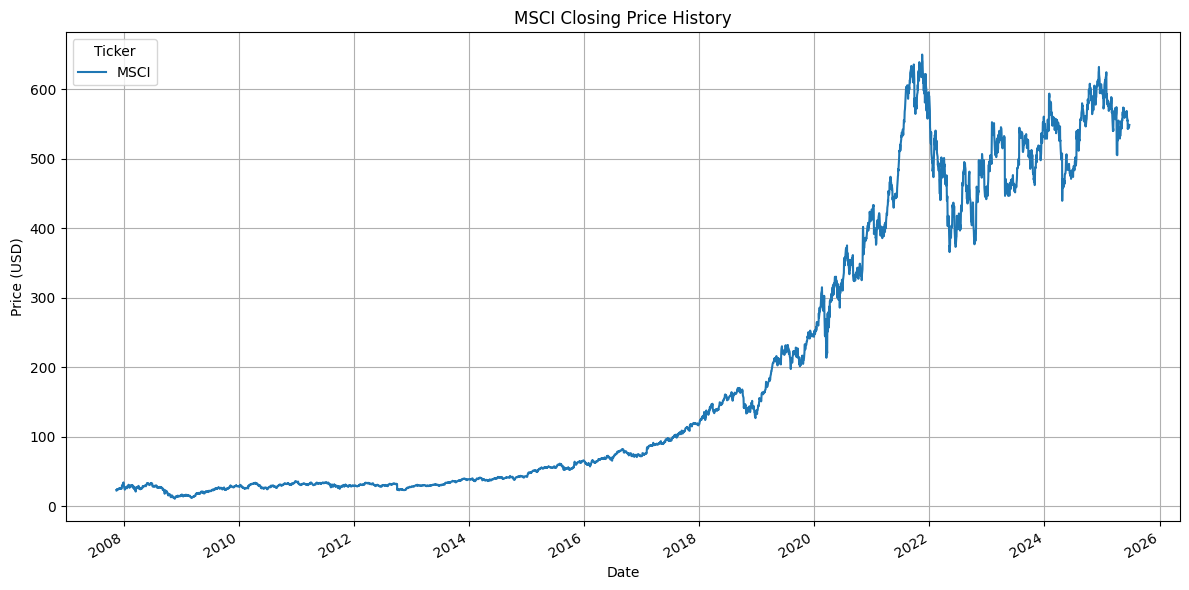

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#Inspect the Downloaded Data

# Pick a sample ticker
sample_ticker = "MSCI"

# Check if the ticker data exists before trying to access it
if sample_ticker in stock_data:
    df = stock_data[sample_ticker]
    print(f"--- Inspecting Data for {sample_ticker} ---\n")

    # 1. Your original checks (still very useful!)
    print("First 5 rows:")
    print(df.head())
    print(f"\nShape of data: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")

    # 2. Deeper inspection using .info()
    print("\nComprehensive info:")
    df.info()

    # 3. Statistical summary
    print("\nStatistical summary:")
    print(df.describe())

    # 4. Check for missing values
    print("\nMissing values count:")
    print(df.isnull().sum())

    # 5. Quick Visualization
    print("\nGenerating a plot of the closing price...")
    try:
        df['Close'].plot(figsize=(12, 6), title=f'{sample_ticker} Closing Price History', grid=True)
        plt.ylabel("Price (USD)")
        plt.xlabel("Date")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not generate plot: {e}")

else:
    print(f"Error: Ticker '{sample_ticker}' not found in the downloaded data.")

In [5]:
from sklearn.preprocessing import MinMaxScaler

ticker = 'AAPL'
df = stock_data[ticker][['Close']].copy()

# Define Train-Test Split
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Verify Scaling
print("Train Min:", train_scaled.min(), "Max:", train_scaled.max())
print("Test Min:", test_scaled.min(), "Max:", test_scaled.max())

Train Min: 0.0 Max: 0.9999999999999999
Test Min: 0.9870852034684483 Max: 4.697072844902534


In [6]:
#Imports and Helper Functions
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os

#Helper Function to Create Sequences
def create_sequences(data, time_steps=60):
    """
    Creates sequences from time series data for LSTM models.
    """
    X, y = [], []
    for i in range(time_steps, len(data)):
        # X = The previous 'time_steps' from the current position
        X.append(data[i-time_steps:i, 0])
        # y = The value at the current position to predict
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [7]:
#The Main Processing Loop
processed_data = {}
scalers = {}
time_steps = 60
train_split_ratio = 0.7
val_split_ratio = 0.15

for ticker in tickers:
    df = stock_data[ticker][['Close']].copy()
    df.dropna(inplace=True)

    if len(df) < 150:
        print(f"⚠️ Skipping {ticker}: Insufficient data points ({len(df)}).")
        continue

    #SPLIT the data chronologically
    total_len = len(df)
    train_end_index = int(total_len * train_split_ratio)
    val_end_index = int(total_len * (train_split_ratio + val_split_ratio))

    train_data = df.iloc[:train_end_index]
    val_data = df.iloc[train_end_index:val_end_index]
    test_data = df.iloc[val_end_index:]

    #SCALE the data
    # Fit the scaler ONLY on the training data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(train_data)

    # Transform all three sets using the fitted scaler
    train_scaled = scaler.transform(train_data)
    val_scaled = scaler.transform(val_data)
    test_scaled = scaler.transform(test_data)

    scalers[ticker] = scaler # Save the scaler for this ticker

    #SEQUENCE the data
    # Create sequences for each dataset independently
    X_train, y_train = create_sequences(train_scaled, time_steps)
    X_val, y_val = create_sequences(val_scaled, time_steps)
    X_test, y_test = create_sequences(test_scaled, time_steps)

    # Reshape for LSTM: [samples, time_steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Store the processed data
    processed_data[ticker] = {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test
    }
    print(f"✅ Processed data for {ticker}")

# Update tickers list to only include successfully processed ones
tickers = list(processed_data.keys())
print(f"\nSuccessfully processed {len(tickers)} stocks.")

✅ Processed data for AAPL
✅ Processed data for ABT
✅ Processed data for ADBE
✅ Processed data for ADP
✅ Processed data for AIG
✅ Processed data for AMD
✅ Processed data for AMGN
✅ Processed data for AMT
✅ Processed data for AMZN
✅ Processed data for AON
✅ Processed data for AVGO
✅ Processed data for AXP
✅ Processed data for BA
✅ Processed data for BDX
✅ Processed data for BIIB
✅ Processed data for BLK
✅ Processed data for BMY
✅ Processed data for BRK-B
✅ Processed data for CAT
✅ Processed data for CHD
✅ Processed data for CHTR
✅ Processed data for CI
✅ Processed data for CME
✅ Processed data for COP
✅ Processed data for COST
✅ Processed data for CSCO
✅ Processed data for CSX
✅ Processed data for CTSH
✅ Processed data for CVS
✅ Processed data for CVX
✅ Processed data for DE
✅ Processed data for DIS
✅ Processed data for EL
✅ Processed data for ETSY
✅ Processed data for GE
✅ Processed data for GM
✅ Processed data for GOOGL
✅ Processed data for GS
✅ Processed data for HD
✅ Processed data f

In [8]:
#Verification of a Sample Ticker
if tickers: # Check if any tickers were processed
    sample_ticker = tickers[0]
    print(f"\n--- Verifying shapes for {sample_ticker} ---")
    print("X_train shape:", processed_data[sample_ticker]['X_train'].shape)
    print("y_train shape:", processed_data[sample_ticker]['y_train'].shape)
    print("X_val shape:", processed_data[sample_ticker]['X_val'].shape)
    print("y_val shape:", processed_data[sample_ticker]['y_val'].shape)
    print("X_test shape:", processed_data[sample_ticker]['X_test'].shape)
    print("y_test shape:", processed_data[sample_ticker]['y_test'].shape)
else:
    print("\nNo tickers were processed.")


--- Verifying shapes for AAPL ---
X_train shape: (4954, 60, 1)
y_train shape: (4954,)
X_val shape: (1014, 60, 1)
y_val shape: (1014,)
X_test shape: (1015, 60, 1)
y_test shape: (1015,)


In [9]:
#Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install -q keras-tcn
from tcn import TCN

In [10]:
# 1. LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25, activation='relu'),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

# 2. TCN Model
def build_tcn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        TCN(nb_filters=64,
            kernel_size=3,
            dilations=[1, 2, 4, 8, 16],
            nb_stacks=1,
            padding='causal',
            use_skip_connections=True,
            dropout_rate=0.1,
            return_sequences=False,
            activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=1) # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

# 3. Transformer Model
def build_transformer_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_encoder_blocks=2, dropout=0.1):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_encoder_blocks):
        # Attention and Normalization
        x_norm = LayerNormalization(epsilon=1e-6)(x)
        attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x_norm, x_norm)
        x = Add()([x, attn_output])

        # Feed Forward Network
        x_norm = LayerNormalization(epsilon=1e-6)(x)
        # The Dropout layer must be part of the Sequential block
        ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dropout(dropout),
            Dense(input_shape[-1]),
        ])(x_norm)
        x = Add()([x, ffn])

    x = GlobalAveragePooling1D(data_format="channels_last")(x)
    x = Dropout(0.1)(x)
    x = Dense(20, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [11]:
#The Unified Training Loop (for Specific Stocks)

#Define the models and their builder functions
models_to_train = {
    "lstm": build_lstm_model,
    "tcn": build_tcn_model,
    "transformer": build_transformer_model
}

#Create dictionaries to store results
trained_models = {}
histories = {}
os.makedirs("saved_models", exist_ok=True)

#specific list of tickers
tickers_to_process = ["NVDA", "JPM", "SNAP", "CVS"]

#loop over specific list instead of all keys
for ticker in tickers_to_process:

    #A safety check to ensure the ticker exists in your data
    if ticker not in processed_data:
        print(f"⚠️ Skipping {ticker}: Not found in processed_data. It might have failed in an earlier step.")
        continue # Skips to the next ticker in the list

    print(f"\n{'='*20} Processing Ticker: {ticker} {'='*20}")

    data = processed_data[ticker]
    input_shape = (data['X_train'].shape[1], data['X_train'].shape[2])

    # Loop through each model type for the current ticker
    for model_name, model_builder in models_to_train.items():
        print(f"\n--- Training {model_name.upper()} model for {ticker} ---")

        # Build a fresh model each time
        model = model_builder(input_shape)

        # Define Callbacks INSIDE the loop
        checkpoint_path = f"saved_models/{ticker}_{model_name}_best.keras"

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_best_only=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        # Train the model
        history = model.fit(
            data['X_train'], data['y_train'],
            validation_data=(data['X_val'], data['y_val']),
            epochs=50,
            batch_size=32,
            callbacks=[early_stopping, model_checkpoint, reduce_lr],
            verbose=1
        )

        # Store results
        key = (ticker, model_name)
        histories[key] = history

        # Load the best performing model from the checkpoint and store it
        print(f"Loading best weights for {model_name} from {checkpoint_path}")
        best_model = tf.keras.models.load_model(checkpoint_path, custom_objects={'TCN': TCN})
        trained_models[key] = best_model

        print(f"✅ {model_name.upper()} training complete for {ticker}. Best val_loss: {min(history.history['val_loss']):.4f}")


==================== Processing Ticker: NVDA ====================

--- Training LSTM model for NVDA ---
Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0073 - mae: 0.0442 - mse: 0.0073 - val_loss: 0.6507 - val_mae: 0.4858 - val_mse: 0.6507 - learning_rate: 0.0010
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.0020e-04 - mae: 0.0117 - mse: 5.0020e-04 - val_loss: 0.5232 - val_mae: 0.4186 - val_mse: 0.5232 - learning_rate: 0.0010
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4189e-04 - mae: 0.0106 - mse: 4.4189e-04 - val_loss: 0.4828 - val_mae: 0.4033 - val_mse: 0.4828 - learning_rate: 0.0010
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.9764e-04 - mae: 0.0122 - mse: 5.9764e-04 - val_loss: 0.4691 - val_mae: 0.4159 - val_mse: 0.4691 - learning_rate: 0.0010
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5468e-04 - mae: 0.0116 - mse: 4.5468e-04 - val_loss: 0.4621 - val_mae: 0.4187 - val_mse: 0.4621 - learning_r

In [12]:
#Evaluation and Results Comparison

results = {}
tickers_to_evaluate = ["NVDA", "JPM", "SNAP", "CVS"]
for (ticker, model_name), model in trained_models.items():


    if ticker not in tickers_to_evaluate:
        continue

    print(f"\n--- Evaluating {model_name.upper()} for {ticker} ---")

    # Get the corresponding test data and scaler
    data = processed_data[ticker]
    scaler = scalers[ticker]
    X_test, y_test = data['X_test'], data['y_test']

    #Make Predictions
    # The model predicts the scaled values
    predicted_scaled = model.predict(X_test)

    #Inverse Transform to Get Real Prices
    #convert scaled 0-1 values back to USD
    predicted_prices = scaler.inverse_transform(predicted_scaled)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Store the real-world actual and predicted prices for analysis
    results[(ticker, model_name)] = {
        'actual': actual_prices.flatten(),
        'predicted': predicted_prices.flatten()
    }

print(f"\n✅ Evaluation complete for {tickers_to_evaluate}. 'results' dictionary is now populated.")


--- Evaluating LSTM for NVDA ---
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

--- Evaluating TCN for NVDA ---
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step

--- Evaluating TRANSFORMER for NVDA ---
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

--- Evaluating LSTM for JPM ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

--- Evaluating TCN for JPM ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step

--- Evaluating TRANSFORMER for JPM ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

--- Evaluating LSTM for SNAP ---
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

--- Evaluating TCN for SNAP ---


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step

--- Evaluating TRANSFORMER for SNAP ---


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step

--- Evaluating LSTM for CVS ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

--- Evaluating TCN for CVS ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step

--- Evaluating TRANSFORMER for CVS ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

✅ Evaluation complete for ['NVDA', 'JPM', 'SNAP', 'CVS']. 'results' dictionary is now populated.


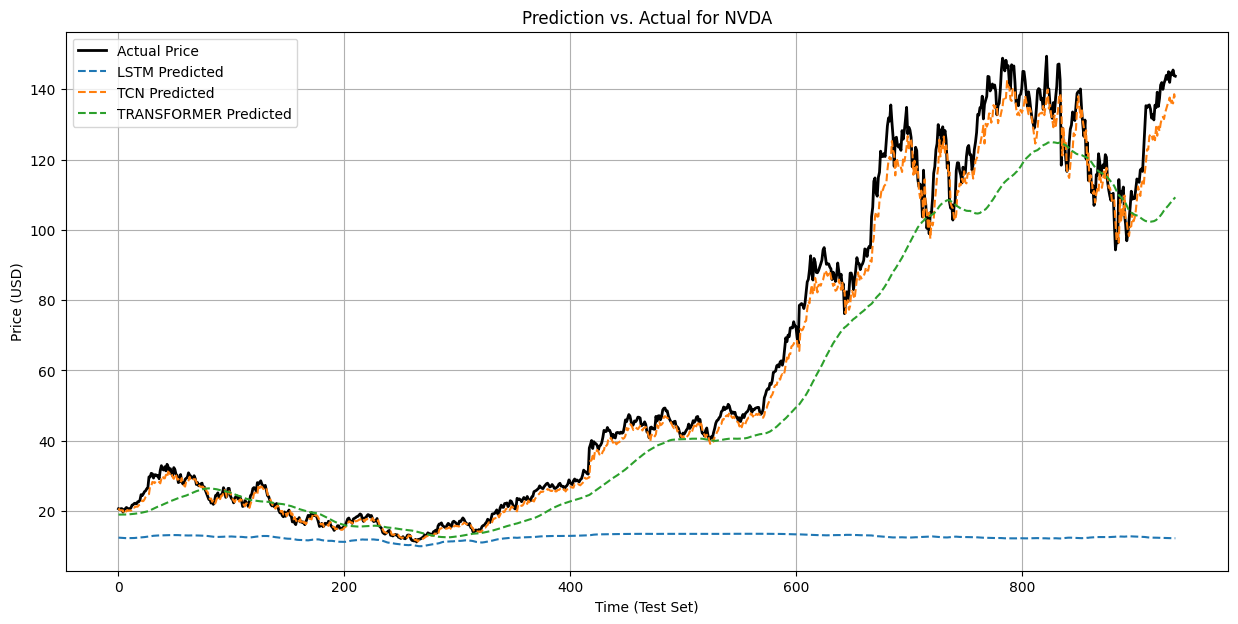

In [13]:
import matplotlib.pyplot as plt

# Example for a single ticker, e.g., 'NVDA'
ticker_to_plot = 'NVDA'
plt.figure(figsize=(15, 7))

# Plot the actual prices
actual_data = results[(ticker_to_plot, 'lstm')]['actual']
plt.plot(actual_data, label='Actual Price', color='black', linewidth=2)

# Plot predictions for each model
for model_name in ['lstm', 'tcn', 'transformer']:
    predicted_data = results[(ticker_to_plot, model_name)]['predicted']
    plt.plot(predicted_data, label=f'{model_name.upper()} Predicted', linestyle='--')

plt.title(f'Prediction vs. Actual for {ticker_to_plot}')
plt.xlabel('Time (Test Set)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import pandas as pd
import numpy as np

def calculate_mape(actual, predicted):
    actual_safe = np.where(actual == 0, 1e-18, actual)
    errors = np.abs((actual - predicted) / actual_safe)
    return np.mean(errors) * 100


summary_data = []
for (ticker, model_name), result_data in results.items():

    #Define variables consistently
    actual_prices = result_data['actual']
    predicted_prices = result_data['predicted']

    mae = np.mean(np.abs(actual_prices - predicted_prices))
    rmse = np.sqrt(np.mean((actual_prices - predicted_prices)**2))
    mape = calculate_mape(actual_prices, predicted_prices)

    # Append all metrics to the list
    summary_data.append({
        "Ticker": ticker,
        "Model": model_name.upper(),
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape
    })

# Create a clean DataFrame from the collected data
summary_df = pd.DataFrame(summary_data).sort_values(by=["Ticker", "RMSE"])

# Print the final, clean table
print("--- Quantitative Model Performance Metrics ---")
print(summary_df.round(4).to_string(index=False))

--- Quantitative Model Performance Metrics ---
Ticker       Model     MAE    RMSE  MAPE (%)
   CVS         TCN  1.3025  1.7882    1.8686
   CVS        LSTM  3.3244  4.1688    4.4425
   CVS TRANSFORMER  6.9616  8.6396    9.1234
   JPM         TCN  4.3997  6.0559    2.7577
   JPM        LSTM 18.6491 28.4399    9.1768
   JPM TRANSFORMER 30.1626 34.5571   17.3843
  NVDA         TCN  3.0380  4.4448    4.7709
  NVDA TRANSFORMER 10.3713 14.7048   16.7485
  NVDA        LSTM 48.6967 66.6392   63.5198
  SNAP         TCN  0.4383  0.5893    4.3168
  SNAP        LSTM  0.5894  0.8494    5.6802
  SNAP TRANSFORMER  1.5552  2.2044   15.8156


In [18]:
#finds the index of the minimum RMSE for each ticker group.
best_models_df = summary_df.loc[summary_df.groupby('Ticker')['RMSE'].idxmin()]

# Sort the final result by Ticker for a clean presentation
best_models_df = best_models_df.sort_values(by='Ticker')

print("--- 🏆 Best Performing Model per Stock (based on lowest RMSE) ---")
print(best_models_df.to_string(index=False))

--- 🏆 Best Performing Model per Stock (based on lowest RMSE) ---
Ticker Model      MAE     RMSE  MAPE (%)
   CVS   TCN 1.302483 1.788194  1.868629
   JPM   TCN 4.399708 6.055916  2.757665
  NVDA   TCN 3.038029 4.444766  4.770915
  SNAP   TCN 0.438334 0.589309  4.316817


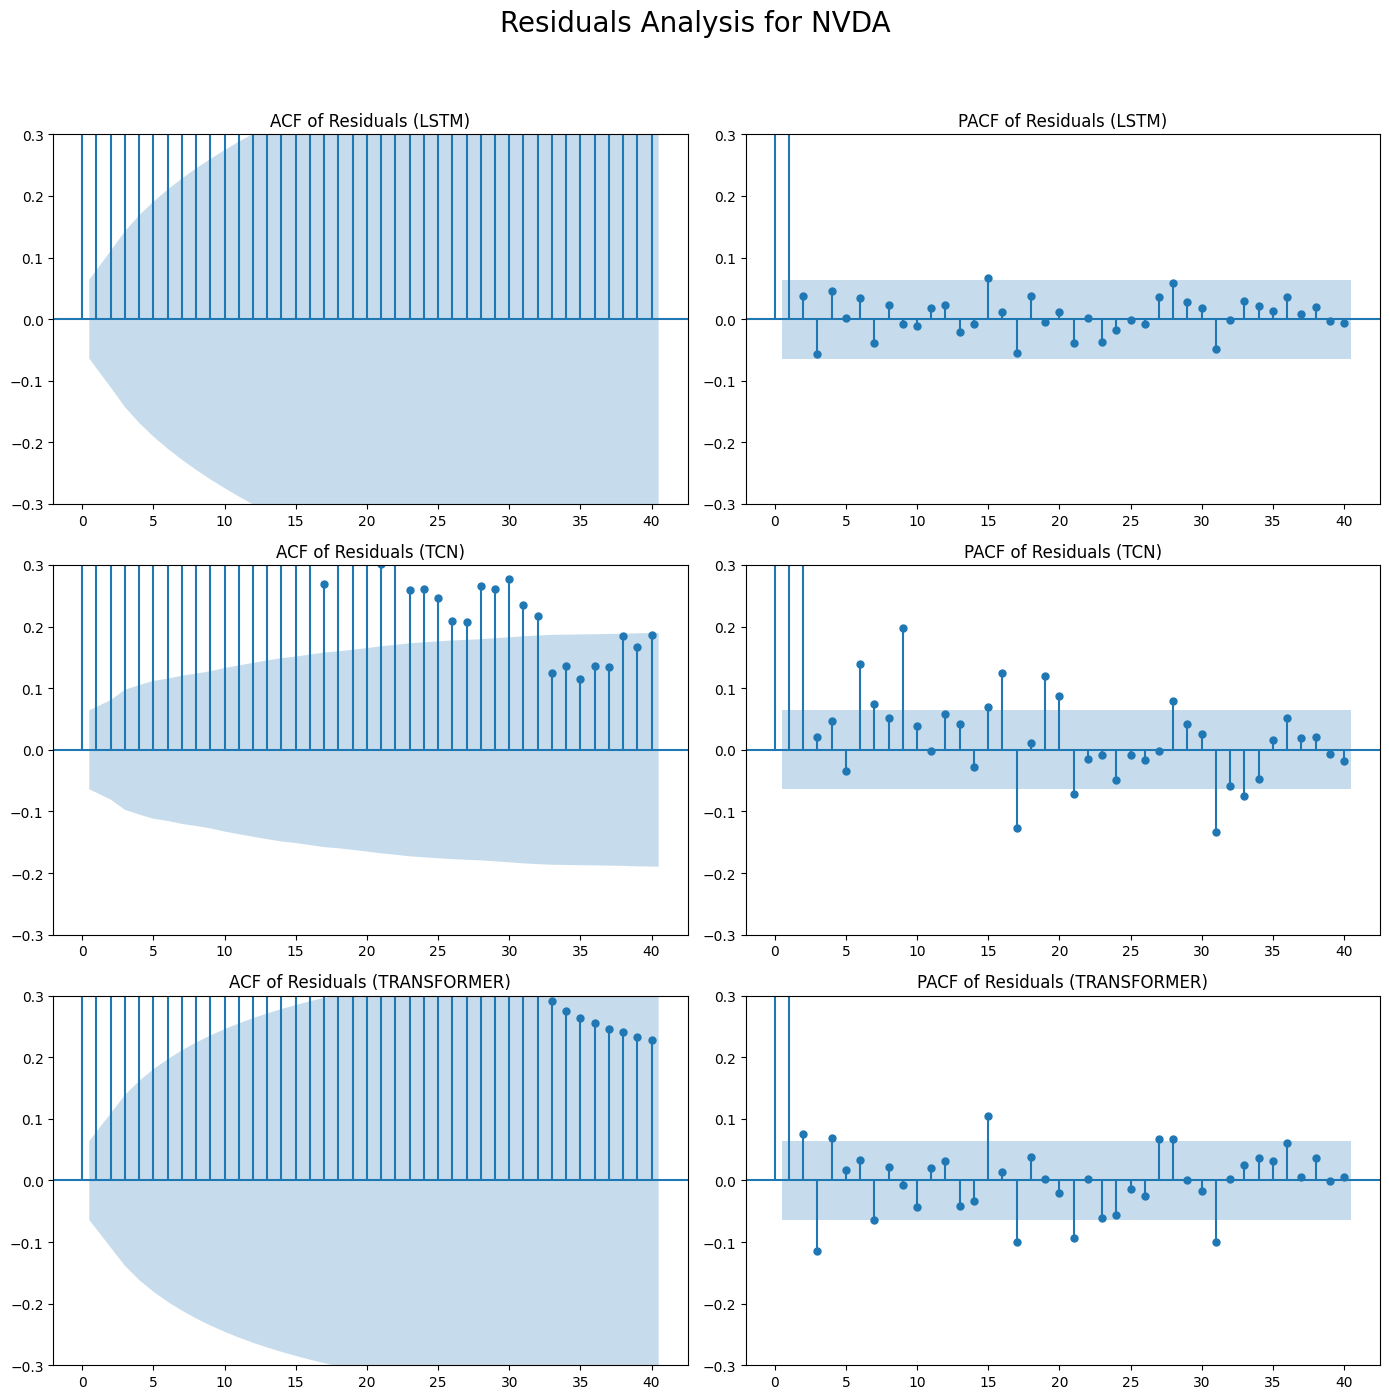

In [20]:
#comparing ACF/PACF plots across all models
import statsmodels.graphics.tsaplots as tsa
import matplotlib.pyplot as plt

sample_ticker = 'NVDA'
model_names = ['lstm', 'tcn', 'transformer']

#Create a figure with a grid of subplots (3 rows, 2 columns) ---
# Each row will represent a model, the left col is ACF, right col is PACF.
fig, axes = plt.subplots(len(model_names), 2, figsize=(14, 15))
fig.suptitle(f'Residuals Analysis for {sample_ticker}', fontsize=20, y=0.93)

#Loop through each model and plot its residuals
for i, model_name in enumerate(model_names):

    #Calculate the residuals for the current model
    if (sample_ticker, model_name) not in results:
        print(f"⚠️ No results found for {sample_ticker} - {model_name}. Skipping.")
        continue

    actuals = results[(sample_ticker, model_name)]['actual']
    predicted = results[(sample_ticker, model_name)]['predicted']
    residuals = actuals - predicted

    #Plot ACF on the left subplot for the current row 'i'
    tsa.plot_acf(residuals, lags=40, ax=axes[i, 0])
    axes[i, 0].set_title(f'ACF of Residuals ({model_name.upper()})')
    axes[i, 0].set_ylim(-0.3, 0.3) # Set consistent y-axis limits for easier comparison

    #Plot PACF on the right subplot for the current row 'i'
    tsa.plot_pacf(residuals, lags=40, ax=axes[i, 1])
    axes[i, 1].set_title(f'PACF of Residuals ({model_name.upper()})')
    axes[i, 1].set_ylim(-0.3, 0.3) # Set consistent y-axis limits

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

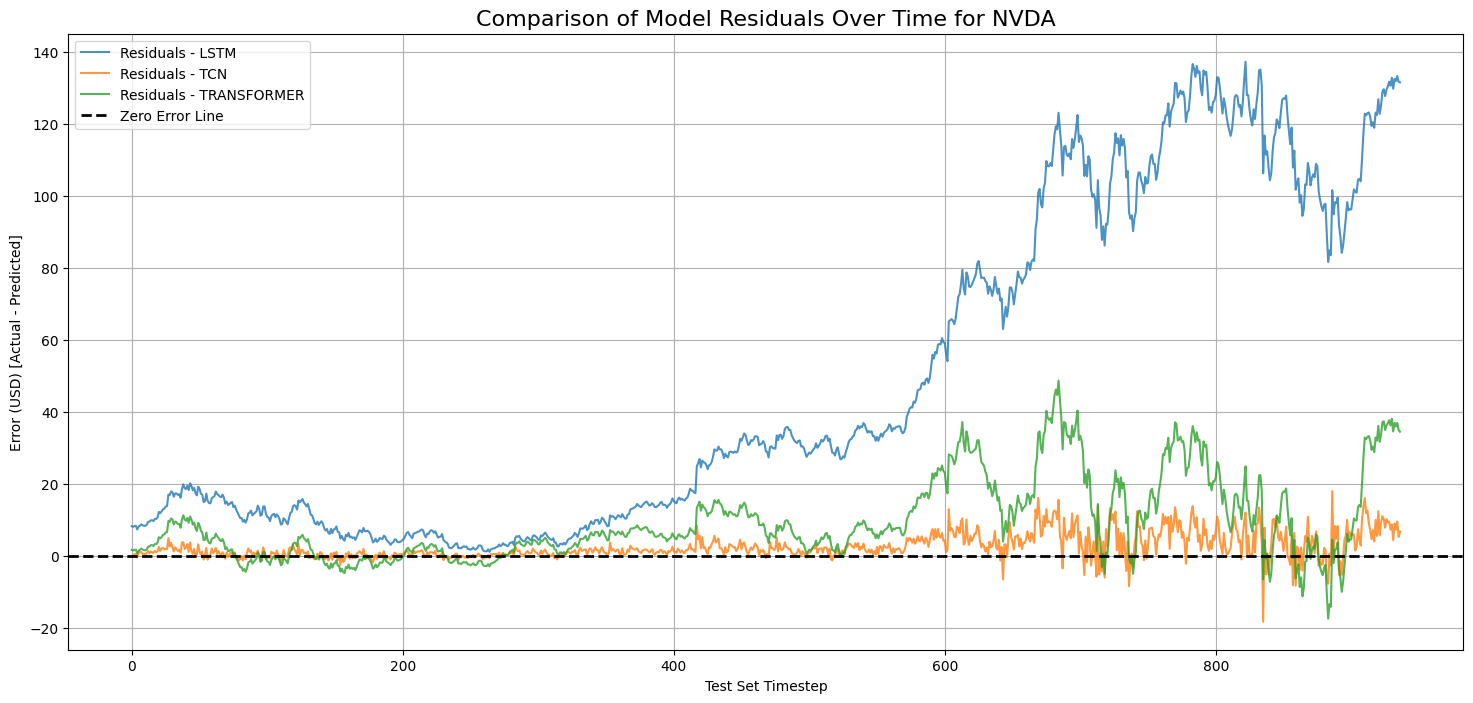

In [22]:
#comparing Residuals Over Time across all models
import matplotlib.pyplot as plt

sample_ticker = 'NVDA'
model_names = ['lstm', 'tcn', 'transformer']

#Create a single figure
plt.figure(figsize=(18, 8))

#Loop through each model and plot its residuals
for model_name in model_names:

    # Check if the results for this model exist
    if (sample_ticker, model_name) not in results:
        print(f"⚠️ No results found for {sample_ticker} - {model_name}. Skipping.")
        continue

    #Calculate the residuals for the current model
    actuals = results[(sample_ticker, model_name)]['actual']
    predicted = results[(sample_ticker, model_name)]['predicted']
    residuals = actuals - predicted

    #Plot the residuals for the current model
    # Use alpha to make lines semi-transparent if they overlap
    plt.plot(residuals, label=f'Residuals - {model_name.upper()}', alpha=0.8)

#Add reference lines and formatting
# Add a line at y=0 for reference (the "perfect prediction" error line)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Zero Error Line')

plt.title(f'Comparison of Model Residuals Over Time for {sample_ticker}', fontsize=16)
plt.xlabel('Test Set Timestep')
plt.ylabel('Error (USD) [Actual - Predicted]')
plt.legend()
plt.grid(True)
plt.show()

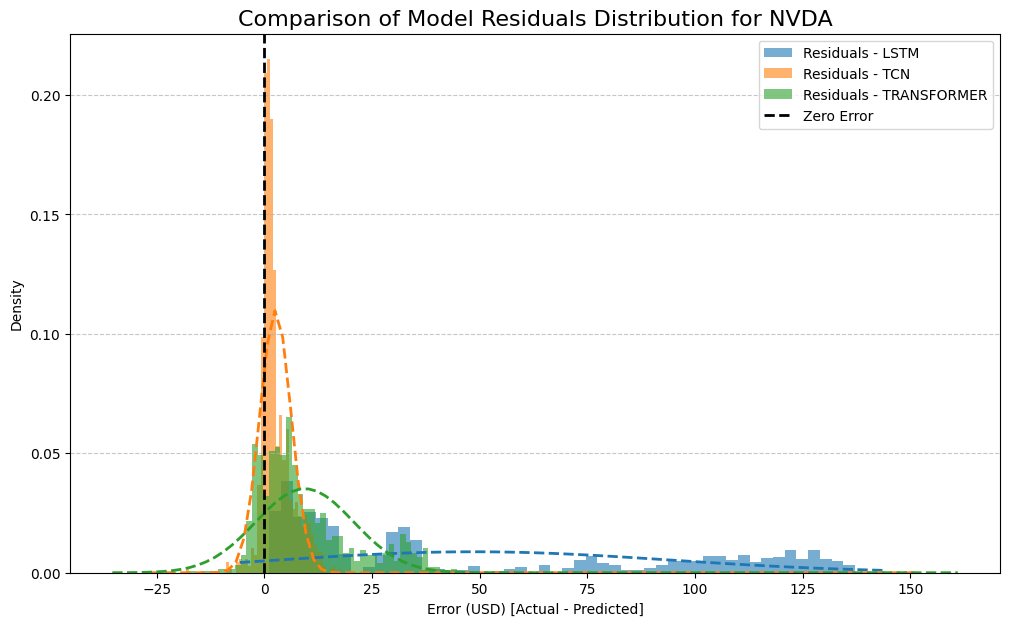

In [24]:
#comparing Histograms of Residuals across all models
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

sample_ticker = 'NVDA'
model_names = ['lstm', 'tcn', 'transformer']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Create a single figure
plt.figure(figsize=(12, 7))

#Loop through each model and plot its residuals histogram
for i, model_name in enumerate(model_names):

    # Check if the results for this model exist
    if (sample_ticker, model_name) not in results:
        print(f"⚠️ No results found for {sample_ticker} - {model_name}. Skipping.")
        continue

    #Calculate the residuals for the current model
    actuals = results[(sample_ticker, model_name)]['actual']
    predicted = results[(sample_ticker, model_name)]['predicted']
    residuals = actuals - predicted


    plt.hist(
        residuals,
        bins=50,
        density=True,
        label=f'Residuals - {model_name.upper()}',
        alpha=0.6,
        color=colors[i]
    )

    #normal fit for each one
    mu, std = norm.fit(residuals)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color=colors[i], linestyle='--', linewidth=2)


#Adding a reference line and formatting
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')

plt.title(f'Comparison of Model Residuals Distribution for {sample_ticker}', fontsize=16)
plt.xlabel('Error (USD) [Actual - Predicted]')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

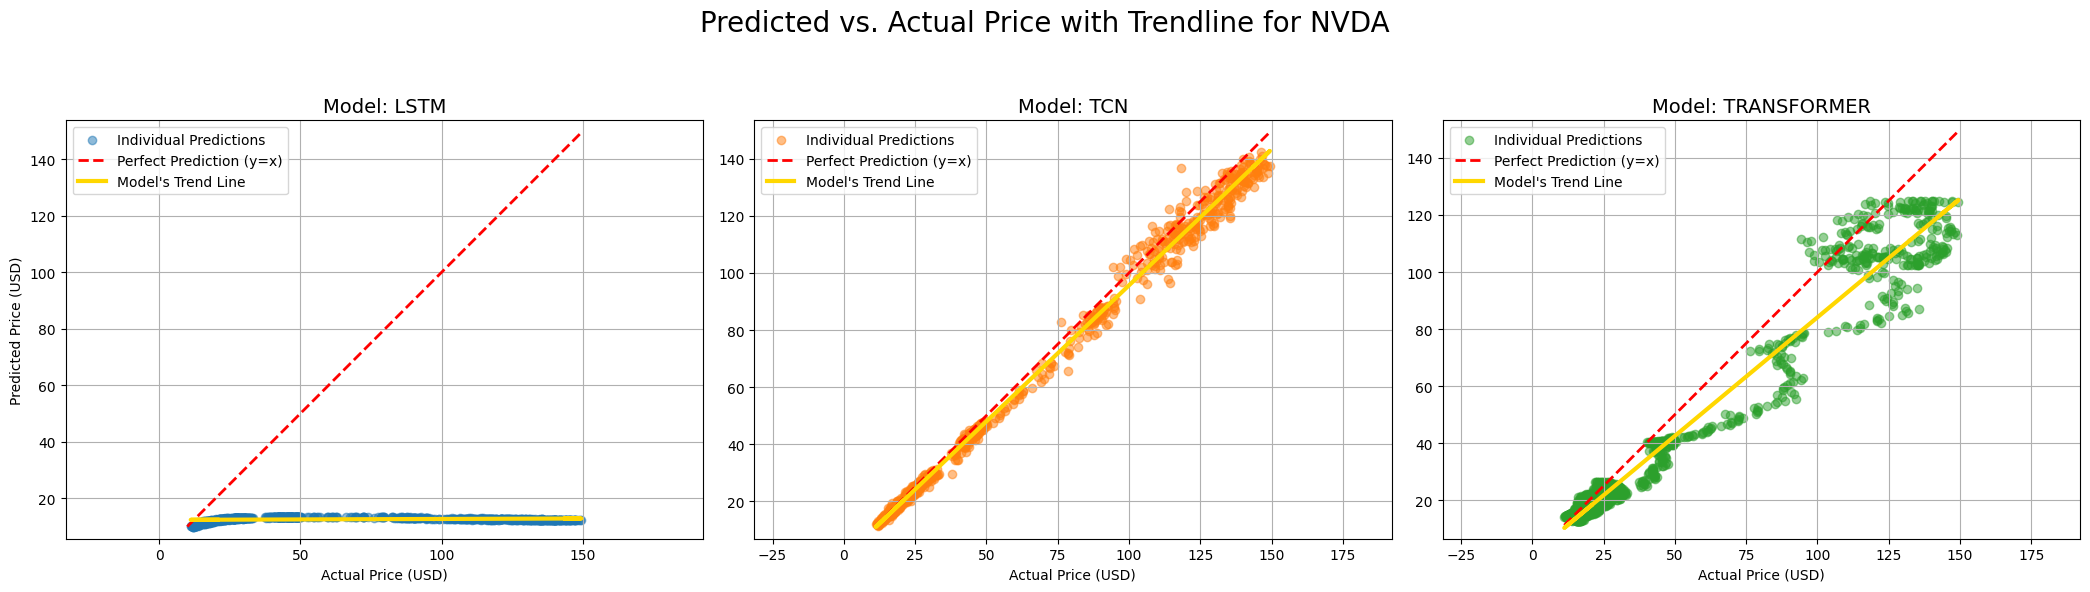

In [26]:
#comparing Predicted vs. Actual Scatter Plots with a trendline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


sample_ticker = 'NVDA'
model_names = ['lstm', 'tcn', 'transformer']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle(f'Predicted vs. Actual Price with Trendline for {sample_ticker}', fontsize=20, y=0.98)

# Loop through each model and create its scatter plot
for i, model_name in enumerate(model_names):

    ax = axes[i]

    if (sample_ticker, model_name) not in results:
        ax.set_title(f'{model_name.upper()}\n(No data)', fontsize=14)
        continue

    #Get data
    actuals = results[(sample_ticker, model_name)]['actual']
    predicted = results[(sample_ticker, model_name)]['predicted']

    #Plot the scatter points
    ax.scatter(actuals, predicted, alpha=0.5, color=colors[i], label='Individual Predictions')

    #Line 1: Perfect Prediction (y=x)
    min_val = min(min(actuals), min(predicted))
    max_val = max(max(actuals), max(predicted))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction (y=x)')

    #Line 2: Model's Actual Trend
    X_actuals = actuals.reshape(-1, 1)

    # Fit a simple linear regression model to the scatter points
    lr = LinearRegression()
    lr.fit(X_actuals, predicted)
    trend_line = lr.predict(X_actuals)

    # Plot the trend line
    ax.plot(actuals, trend_line, color='gold', linewidth=3, label="Model's Trend Line")

    #Formatting
    ax.set_title(f'Model: {model_name.upper()}', fontsize=14)
    ax.set_xlabel('Actual Price (USD)')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')

axes[0].set_ylabel('Predicted Price (USD)')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()